Now let's look at the second question of interest.  That is - What does the data suggest of Bootcamp grads in terms of job placement and salary?

Again, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# need to find the path to the csv file
df = pd.read_csv('./survey_results_public.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './survey_results_public.csv'

In [3]:
#In this case, we want to look at bootcamp data
#First - let's just look at how many people took a bootcamp in the dataset

bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==True] 
bootcamp_df.shape

(2602, 154)

In [4]:
# Looks like a reasonable sample of ~2600 people

#Additional questions about bootcamps - they suggest high salaries, placement, 
#helping those with non-traditional backgrounds and diversity break into tech... let's see what
#the data suggests.

In [5]:
bootcamp_df['Gender'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['Gender'].isnull()))

Male                                                       0.863071
Female                                                     0.112494
Other                                                      0.006455
Gender non-conforming                                      0.005533
Male; Other                                                0.002766
Female; Gender non-conforming                              0.001383
Male; Gender non-conforming                                0.001383
Male; Female; Transgender; Gender non-conforming; Other    0.000922
Male; Female                                               0.000922
Transgender; Gender non-conforming                         0.000922
Transgender                                                0.000922
Female; Transgender; Gender non-conforming                 0.000922
Male; Transgender                                          0.000922
Male; Female; Transgender; Gender non-conforming           0.000461
Male; Gender non-conforming; Other              

In [6]:
not_bootcamp_df['Gender'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['Gender'].isnull()))

Male                                                       0.903857
Female                                                     0.071659
Other                                                      0.006418
Male; Other                                                0.005019
Gender non-conforming                                      0.004501
Male; Gender non-conforming                                0.001886
Female; Transgender                                        0.001703
Transgender                                                0.001612
Female; Gender non-conforming                              0.000791
Male; Female; Transgender; Gender non-conforming; Other    0.000395
Transgender; Gender non-conforming                         0.000395
Male; Female                                               0.000395
Male; Transgender                                          0.000274
Male; Female; Transgender; Gender non-conforming           0.000182
Female; Transgender; Gender non-conforming      

In [7]:
#It does appear there is a small push for diversity overall by bootcamps, but not huge...

In [8]:
bootcamp_df['FormalEducation'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.475019
Master's degree                                                      0.225211
Some college/university study without earning a bachelor's degree    0.162567
Secondary school                                                     0.069562
Doctoral degree                                                      0.022291
Professional degree                                                  0.016141
I prefer not to answer                                               0.011914
Primary/elementary school                                            0.009224
I never completed any formal education                               0.008071
Name: FormalEducation, dtype: float64

In [9]:
not_bootcamp_df['FormalEducation'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.417565
Master's degree                                                      0.216335
Some college/university study without earning a bachelor's degree    0.157942
Secondary school                                                     0.117381
Doctoral degree                                                      0.025620
I prefer not to answer                                               0.022095
Primary/elementary school                                            0.020967
Professional degree                                                  0.013794
I never completed any formal education                               0.008301
Name: FormalEducation, dtype: float64

In [10]:
#In terms of formal education it looks basically the same - more bachelors degree holders do 
#bootcamps, but fewer phds do bootcamps.

In [11]:
bootcamp_df['TimeAfterBootcamp'].value_counts()/bootcamp_df.shape[0]

I already had a job as a developer when I started the program    0.458493
Immediately upon graduating                                      0.112990
I got a job as a developer before completing the program         0.096849
One to three months                                              0.087625
I haven't gotten a job as a developer yet                        0.081091
Less than a month                                                0.059954
Four to six months                                               0.040354
Longer than a year                                               0.032667
Six months to a year                                             0.029977
Name: TimeAfterBootcamp, dtype: float64

In [12]:
#So interestingly this data makes it more difficult to analyze the impact of bootcamps,
# as many of the students already had developer jobs before starting the program
# we could remove them?

#If you are truly new to the space, we can rule out that you already have a job as a developer
# then we can look at the other individuals and see which are still not 

not_devs = bootcamp_df[bootcamp_df['TimeAfterBootcamp']!="I already had a job as a developer when I started the program"]

In [13]:
not_devs['TimeAfterBootcamp'].value_counts()/not_devs.shape[0]

Immediately upon graduating                                 0.208659
I got a job as a developer before completing the program    0.178850
One to three months                                         0.161817
I haven't gotten a job as a developer yet                   0.149752
Less than a month                                           0.110717
Four to six months                                          0.074521
Longer than a year                                          0.060326
Six months to a year                                        0.055358
Name: TimeAfterBootcamp, dtype: float64

In [14]:
bootcamp_df[bootcamp_df['Salary']==195000]

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1696,1697,Professional developer,"Yes, both",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"10,000 or more employees",...,Disagree,Male,High school,White or of European descent,Disagree,Agree,Disagree,Agree,195000.0,NaN


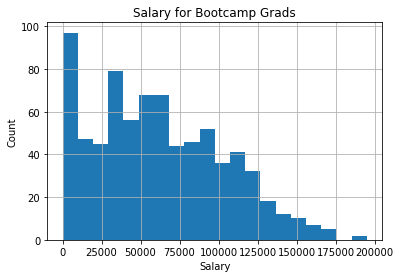

In [16]:
bootcamp_df['Salary'].hist(bins=20);
plt.title('Salary for Bootcamp Grads');
plt.xlabel('Salary');
plt.ylabel('Count');

In [17]:
bootcamp_df['Salary'].describe()

count       765.000000
mean      61775.438188
std       41797.379964
min           0.029364
25%       29520.430108
50%       56980.056980
75%       91397.849462
max      195000.000000
Name: Salary, dtype: float64

In [ ]:
#Here we can get some idea of how bootcamp grades fair, but this isn't straightforward.
#Many of these individuals are not new to the field, and the salaries are all over the place
#But the descriptive statistics here give us some ideas... just nothing really concrete